In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import argparse
import sys
import os
import tensorflow as tf
from tensorflow import keras

import numpy as np
import random
import matplotlib.pyplot as plt

from minihip import cnn  
from minihip import dataset 
from minihip import optimise 
from minihip import history
from minihip import evaluate as ev

import pandas as pd

In [7]:
data = dataset.april_pandas()
data.load('rim') # channels b,halo, and rim
# Dataset is a class that loads numpy array data (or pandas), and performs k-folding (k=5)
# the class method data.kfold(i) returns the i'th training set and i'th test set as ready batched tf-datasets

(1397,)
(1575,)
1344
1575


In [5]:
MODEL = cnn.Cnn()
MODEL.set_architecture('ktt') 
model=MODEL.create_model()
# creates an archetypal network configuration, create_model sets up a specific keras instance 
# of that model with optimiser and metrics

Train for 5 steps, validate for 1 steps
Epoch 1/60
5/5 [==============================] - 1s 171ms/step - loss: 0.6783 - acc: 0.5320 - val_loss: 0.6601 - val_acc: 0.5000
Epoch 2/60
5/5 [==============================] - 0s 28ms/step - loss: 0.6431 - acc: 0.5320 - val_loss: 0.6088 - val_acc: 0.5000
Epoch 3/60
5/5 [==============================] - 0s 26ms/step - loss: 0.5924 - acc: 0.5040 - val_loss: 0.5502 - val_acc: 0.5125
Epoch 4/60
5/5 [==============================] - 0s 28ms/step - loss: 0.5511 - acc: 0.4960 - val_loss: 0.5016 - val_acc: 0.5600
Epoch 5/60
5/5 [==============================] - 0s 25ms/step - loss: 0.4932 - acc: 0.5920 - val_loss: 0.4643 - val_acc: 0.6525
Epoch 6/60
5/5 [==============================] - 0s 25ms/step - loss: 0.4547 - acc: 0.7080 - val_loss: 0.4336 - val_acc: 0.7875
Epoch 7/60
5/5 [==============================] - 0s 27ms/step - loss: 0.4394 - acc: 0.8040 - val_loss: 0.4083 - val_acc: 0.8750
Epoch 8/60
5/5 [==============================] - 0s 27m

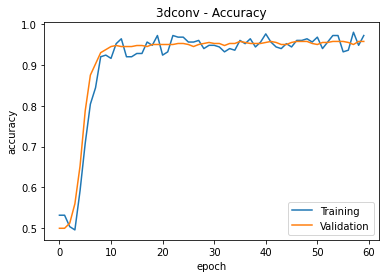

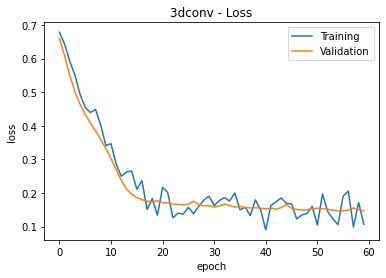

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


In [6]:
# eg, training run
train,test = data.kfold(3)
hist = optimise.train_model(train,test,'3dconv',model=model)

hist.plot_acc(val=True)
hist.plot_loss(val=True)
print(hist.history.keys())